# 30: CLUSTERING JERARQUICO

- X - Es el datadrame
- n - Es el número de filas
- m - Es el número de columnas
- Z - Es el array que contiene la información de los distintos clusters (muestras a unir, distancia...)
- k - Es el número de clusters que se van a hacer

### Crear un dataframe ficticio para el ejercicio

In [1]:
# Cargar las librerias

from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Generar el dataframe

np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))

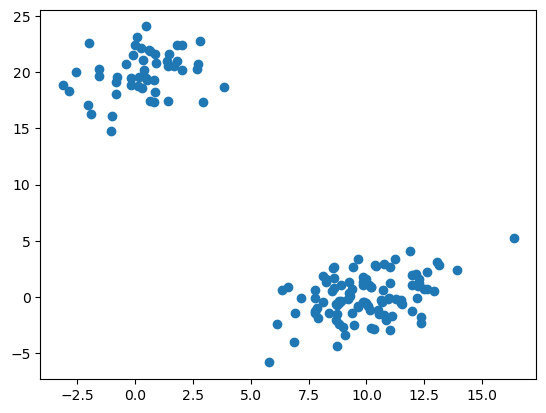

In [3]:
# Visualizar los datos con un plot

plt.scatter(X[:,0], X[:,1])
plt.show()

### Clusterizar con la librería scipy.cluster

In [5]:
# Importar las librerías

from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [6]:
# realizar el cluster de tipo 'ward'. Recordemos que existen diferentes tipos de clustering

Z = linkage(X, 'ward')

In [8]:
# Visualizar la matriz de enlaces

Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [42]:
# Visualizar los últimos 4 enlaces

Z[-4 :,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

In [16]:
# Visualizar uno de los enlaces de forma especifica. En este caso, el cluster nº 2

Z[2]

array([33.        , 68.        ,  0.07106779,  2.        ])

In [18]:
# Visualizar los datos que se clusterizaron en el 2º cluster (33 y 68)

X[[33, 68]]

array([[ 9.83913054, -0.48729797],
       [ 9.8934927 , -0.44152257]])

Como se puede ver, los datos son muy similares entre ellos. Por este motivo, se han juntado en un cluster.

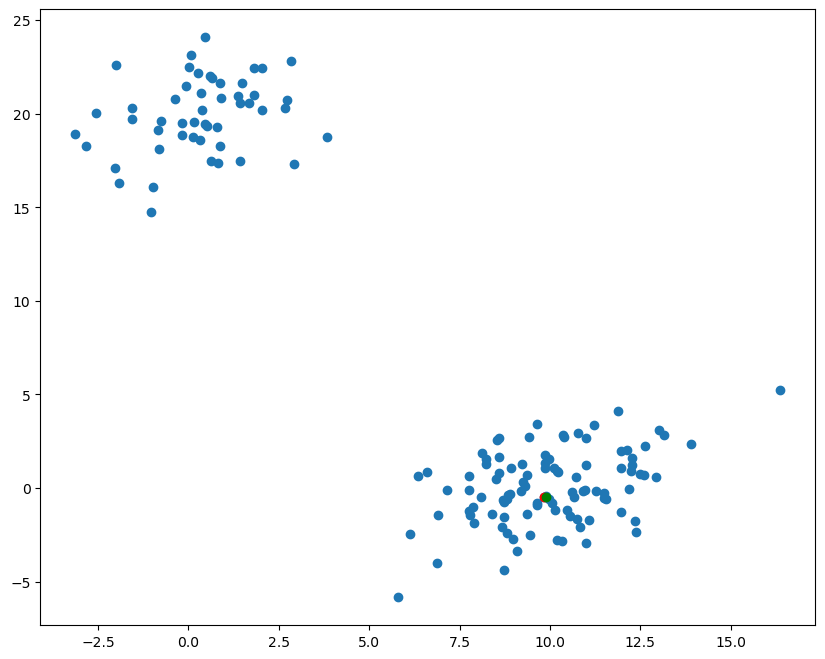

In [26]:
# Visualizar estos dos puntos en el plot

plt.figure(figsize = (10, 8))
plt.scatter(X[:,0], X[:,1])

plt.scatter(X[33, 0], # Le damos las coordenadas x de la posición 33
            X[33, 1], # Le damos las coordenadas y de la posición 33
            c = 'r') # Pintamos de rojo el punto nº33 

plt.scatter(X[68, 0], X[33, 1], c = 'g') # El mismo código de arriba pero en una línea y con la posición 68

plt.show()

### Representación gráfica de un DENDROGRAMA

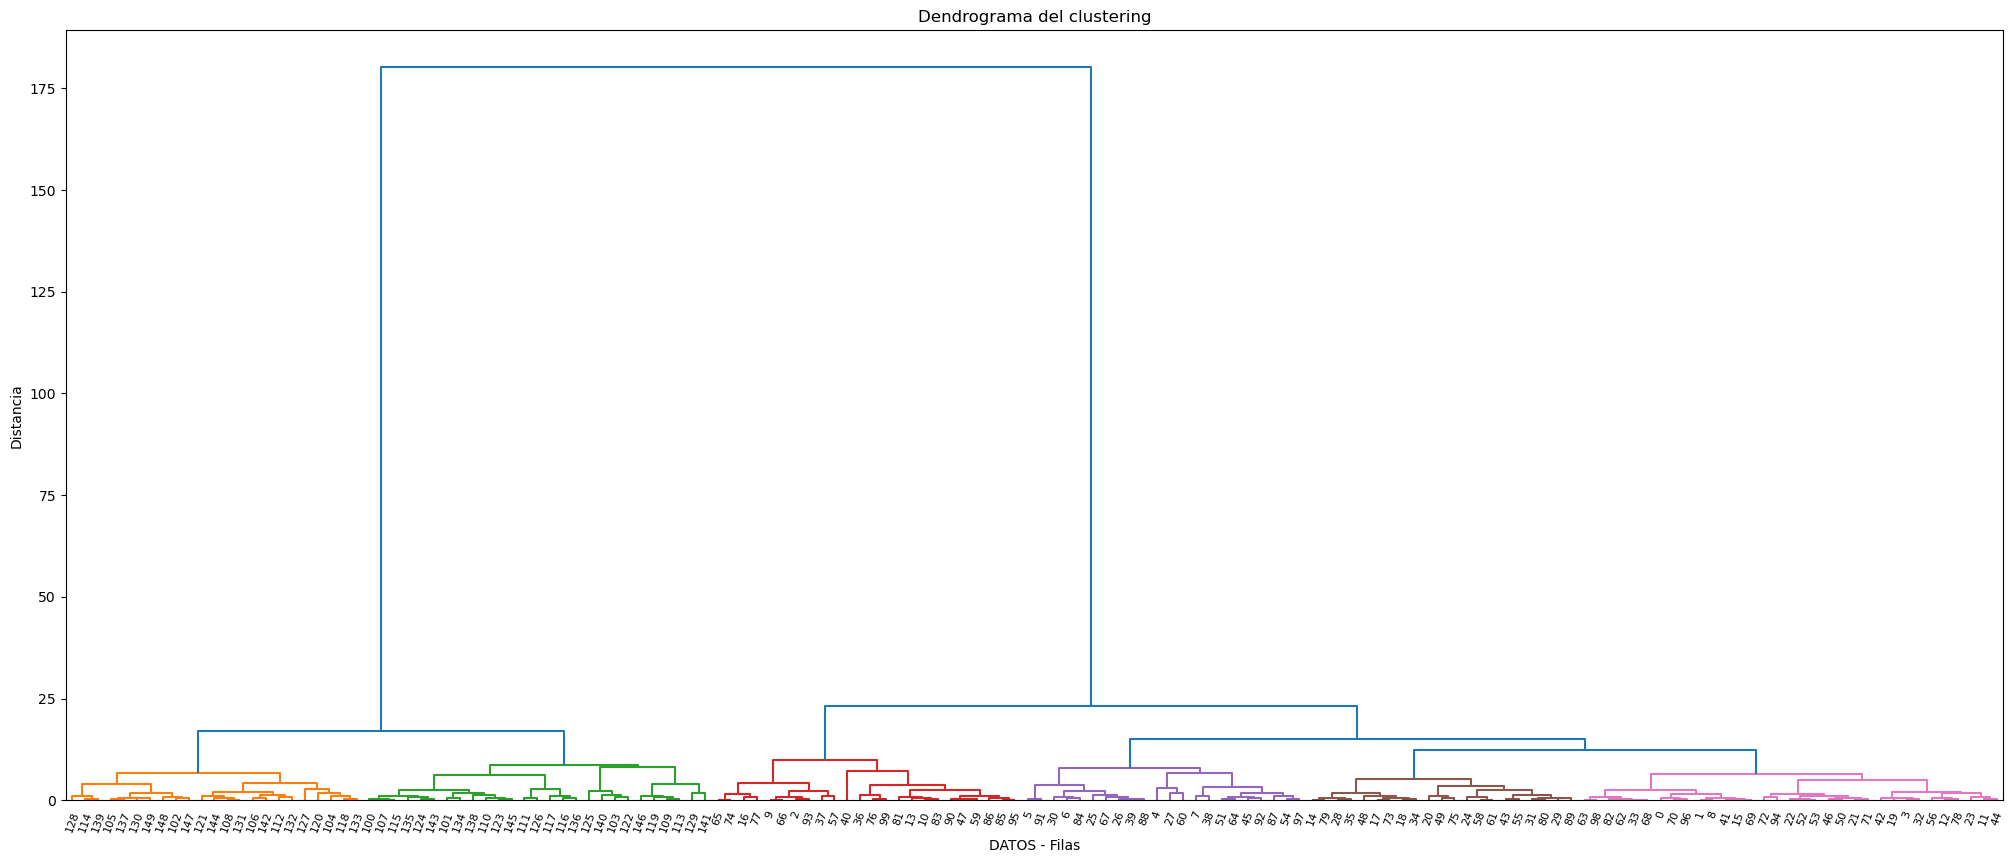

In [39]:
# Plot del DENDROGRAMA creado en la variable Z

plt.figure(figsize = (25, 10))
plt.title('Dendrograma del clustering')
plt.xlabel('DATOS - Filas')
plt.ylabel('Distancia')

dendrogram(Z, # array de enlaces de los clusters
          leaf_rotation= 70, # Esto especifica el angulo del nombre de las muestras (filas) en el eje X
          leaf_font_size= 8, # Esto especifica el tamaño del nombre de las muestras (filas)
          color_threshold = 10) # Esto especifica a que altura (distancia) establecemos la diferencia entre un cluster y otro, y lo pintamos

plt.show()

### Truncar el DENDROGRAMA

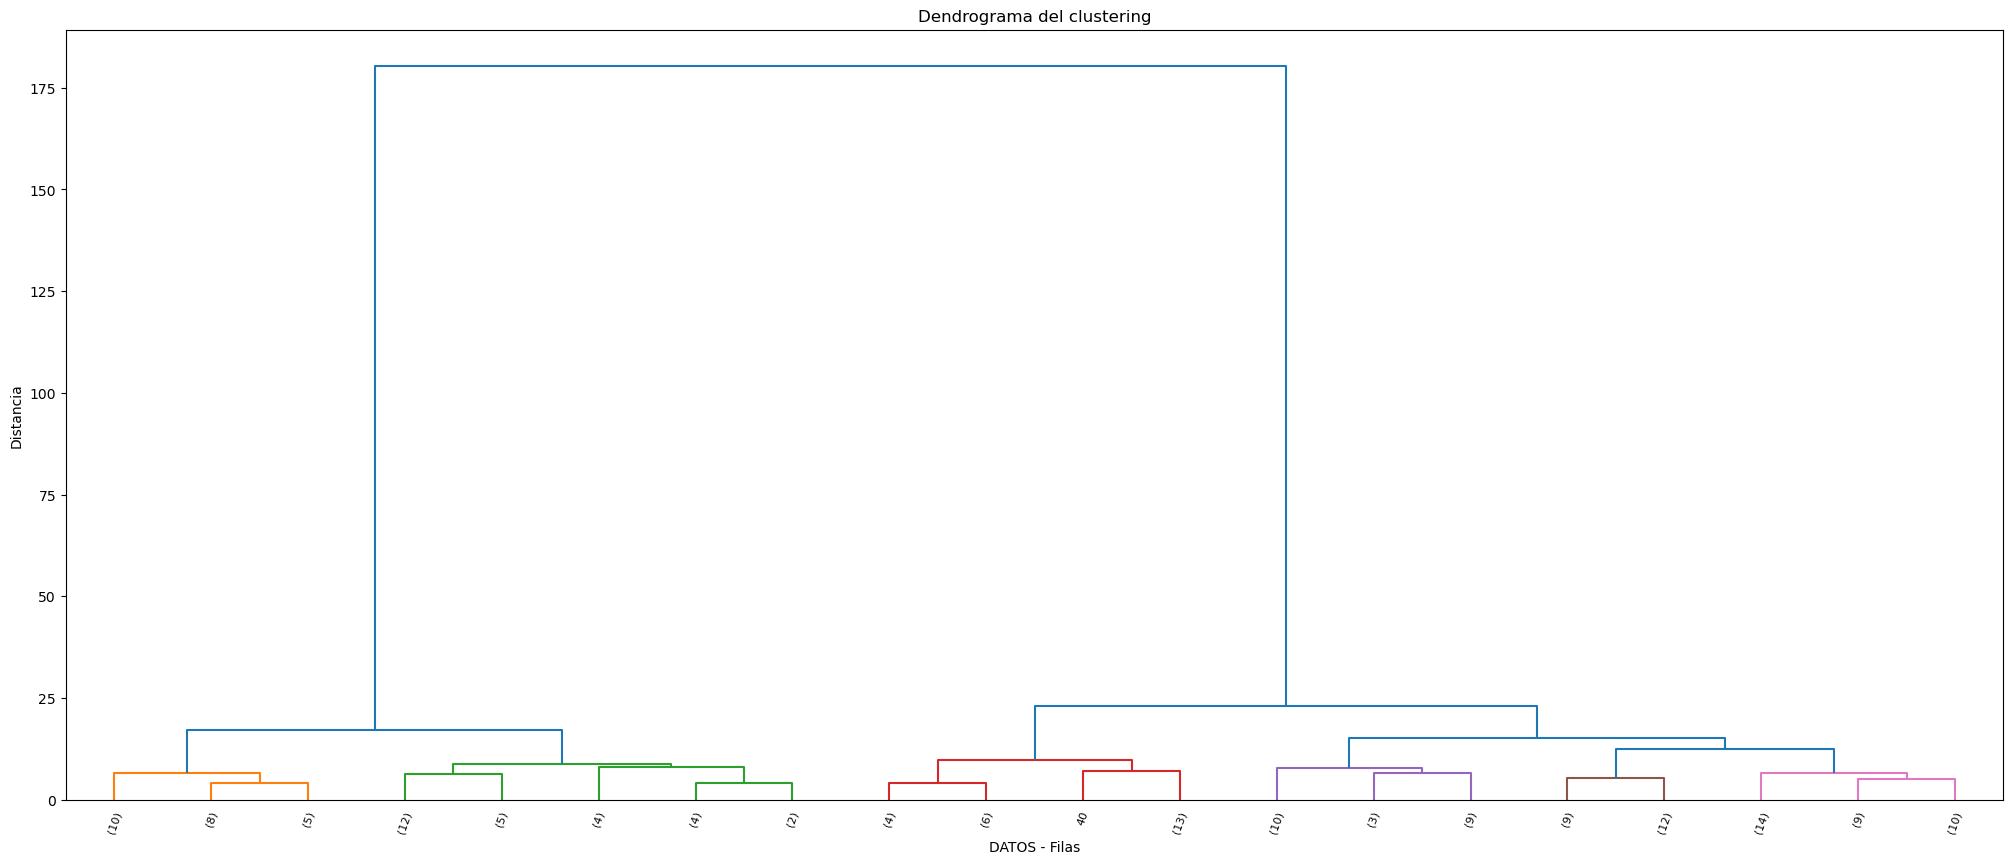

In [53]:
plt.figure(figsize = (25, 10))
plt.title('Dendrograma del clustering')
plt.xlabel('DATOS - Filas')
plt.ylabel('Distancia')

dendrogram(Z, 
          leaf_rotation= 70, 
          leaf_font_size= 8, 
          color_threshold = 12,
          truncate_mode = 'lastp', # tipo de truncación
          p = 20, # distancia a la que establecemos el corte
          show_leaf_counts = True, # muestra o no los datos que se custerizan en el eje X
          show_contracted = False) # muestra o no el cluster --> mejor dejarlo en False, queda mejor

plt.show()

### Establecer el corte del clustering de forma automática

In [54]:
# Importar la librería 

from scipy.cluster.hierarchy import inconsistent

In [55]:
# Establecer el corte

inconsistencia = inconsistent(Z, # es el array de enlaces 
                             3) # es la profundidad

### Método del codo

In [61]:
# Guardar los ultimos 10 enlaces y ordenarlos empezando por el primero

ultimas_distancias = Z[-10:, 2]
ultimos_ordenados = ultimas_distancias[::-1]
ultimos_ordenados

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

In [63]:
# Crear un vector del 1 al 10, es decir, el numero de enlaces que hemos cogido

vector = np.arange(1, len(ultimos_ordenados) + 1)
vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

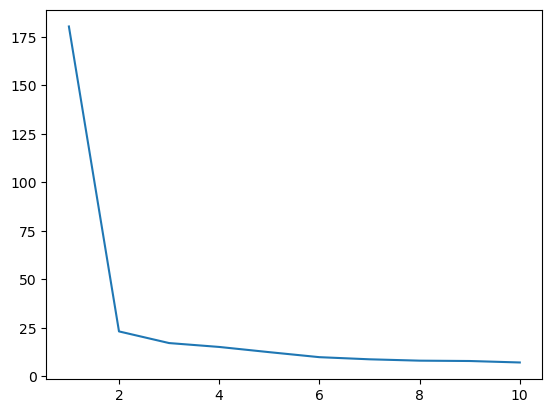

In [65]:
# Visualizar los datos

plt.plot(vector, ultimos_ordenados)

In [73]:
# Guardar la posición n esima del vector array de los enlaces

acc = np.diff(ultimos_ordenados, 2)
acc

array([ 1.51141725e+02,  4.00677330e+00, -6.88042176e-01,  1.04916333e-01,
        1.48701273e+00,  3.97185622e-01,  5.18302524e-01, -5.77157189e-01])

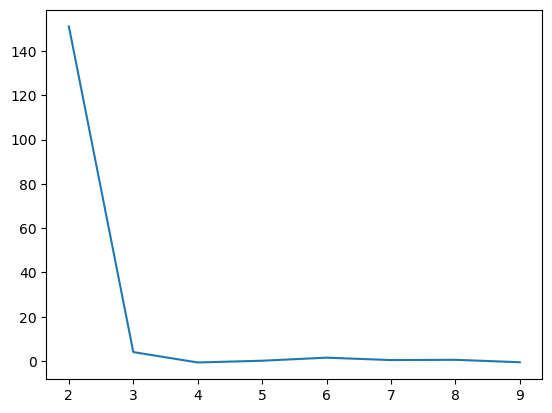

In [76]:
# Visualizar los nuevos datos creados

plt.plot(vector[:-2] + 1, acc)

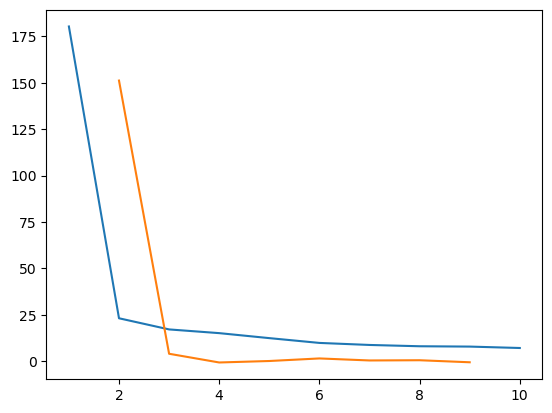

In [77]:
# Visualizar ambos codos juntos

plt.plot(vector, ultimos_ordenados)
plt.plot(vector[:-2] + 1, acc)
plt.show()

In [79]:
# Visualizar cual es número óptimo de clusters

optimo = acc.argmax() + 2
optimo

2

### Pintar cada cluster de un color distinto

In [92]:
# Importar la librería

from scipy.cluster.hierarchy import fcluster

In [104]:
# Establecer los distintos clusters

clusters = fcluster(Z, # matriz de distancias
                    150, # punto de corte entre clusters
                    criterion = "maxclust")
clusters

array([125, 126,  57, 139,  87,  75,  77,  88, 127,  55,  64, 146, 143,
        66,  97, 128,  53, 100, 102, 141, 107, 137, 134, 148, 110,  84,
        82,  85,  98, 115,  79, 113, 140, 119, 103,  99,  63,  59,  89,
        80,  74, 130, 142, 111, 147,  92, 135,  68, 104, 105, 136,  90,
       133, 133,  94, 112, 145,  60, 108,  69,  86, 109, 121, 117,  91,
        51,  56,  83, 120, 129, 123, 138, 131, 101,  52, 106,  61,  54,
       144,  97, 114,  67, 122,  65,  78,  71,  73,  96,  81, 116,  70,
        76,  93,  58, 132,  72, 124,  95, 118,  62,  26,  30,   8,  41,
        21,   4,  15,  24,  11,  45,  34,  36,  17,  46,   1,  25,  38,
        40,  19,  47,  22,  14,  42,  32,  27,  44,  37,  23,   3,  49,
         6,  12,  18,  20,  31,  29,  39,   5,  35,   2,  43,  50,  16,
        28,  13,  33,  48,   9,  10,   7], dtype=int32)

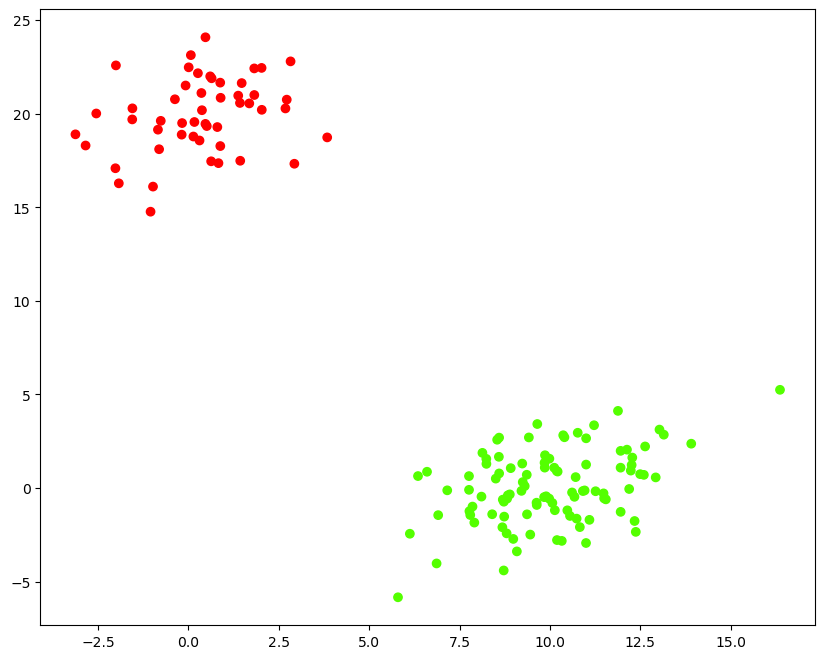

In [95]:
# Visualizar los datos

plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap = "prism")
plt.show()

### Ejemplo Nº 2

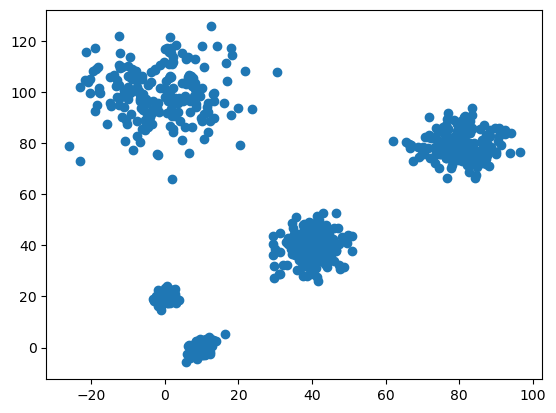

In [80]:
# Crear un nuevo conjunto de datos y visualizarlo

c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size = [200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size = [200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size = [200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

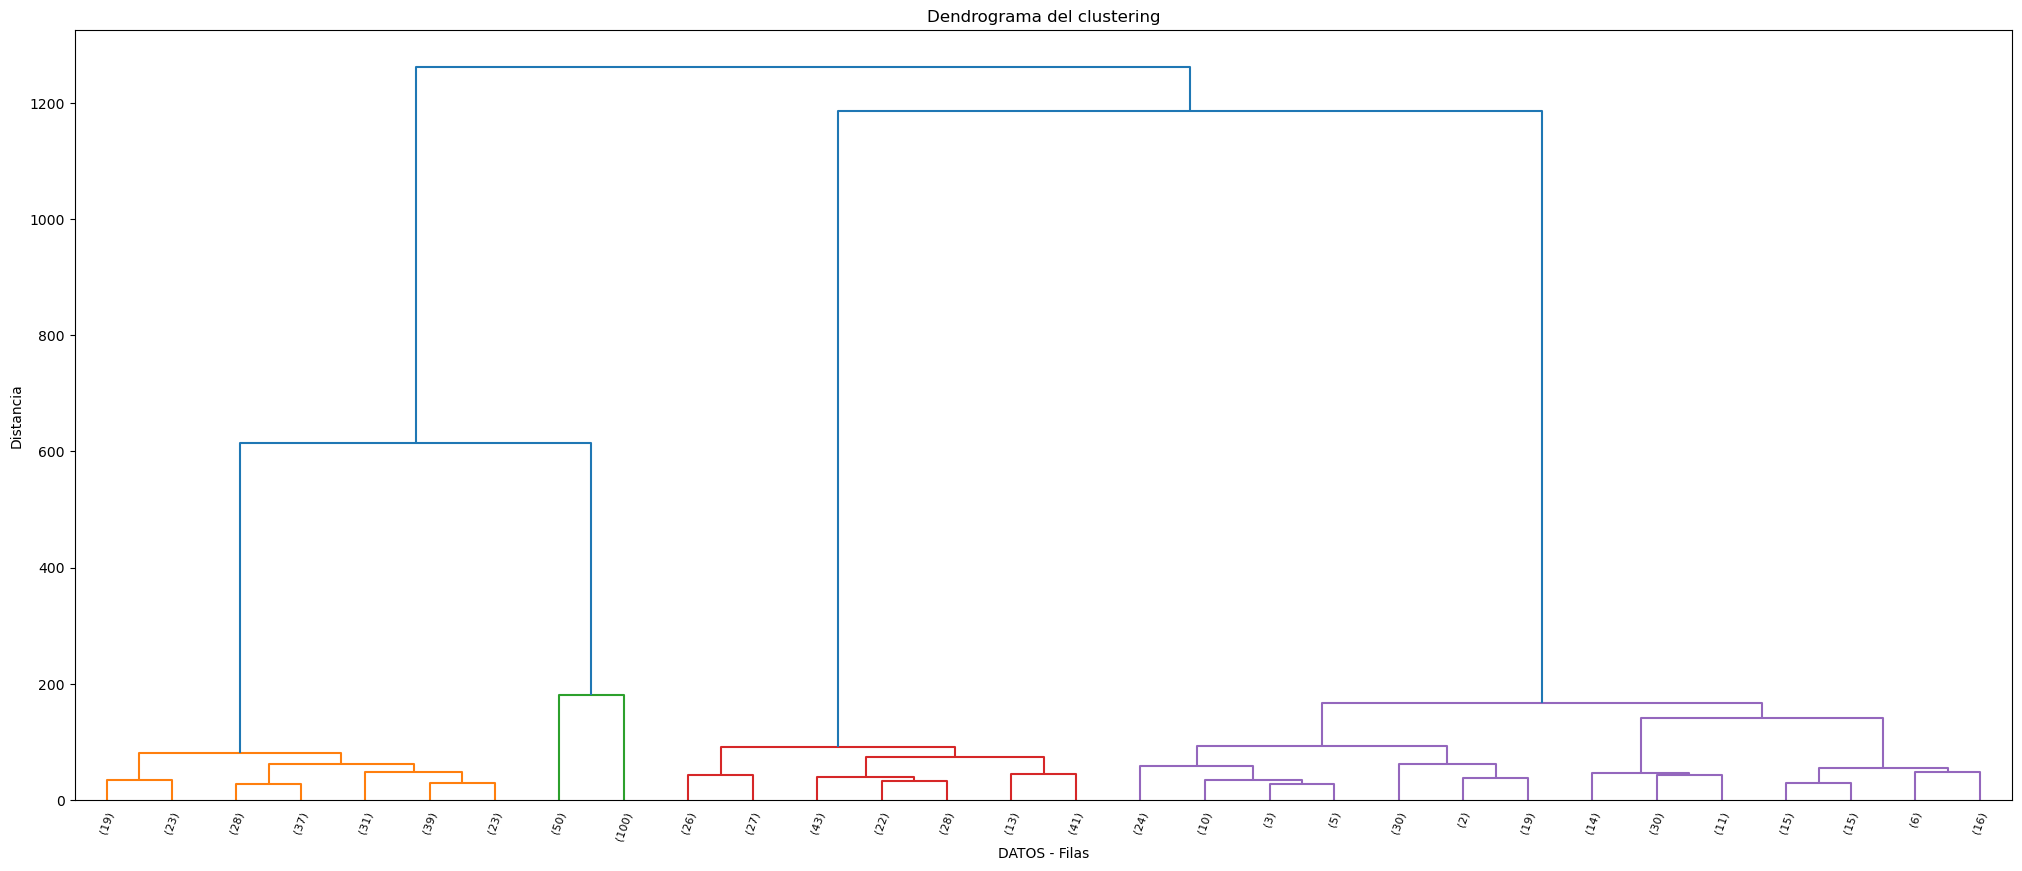

In [88]:
# Hacer el clustering y visualizar el dendrograma

Z2 = linkage(X2,"ward")

plt.figure(figsize = (25, 10))
plt.title('Dendrograma del clustering')
plt.xlabel('DATOS - Filas')
plt.ylabel('Distancia')

dendrogram(Z2, 
          leaf_rotation= 70, 
          leaf_font_size= 8, 
          color_threshold = 200,
          truncate_mode = 'lastp',
          p = 30,
          show_leaf_counts = True, 
          show_contracted = False)

plt.show()

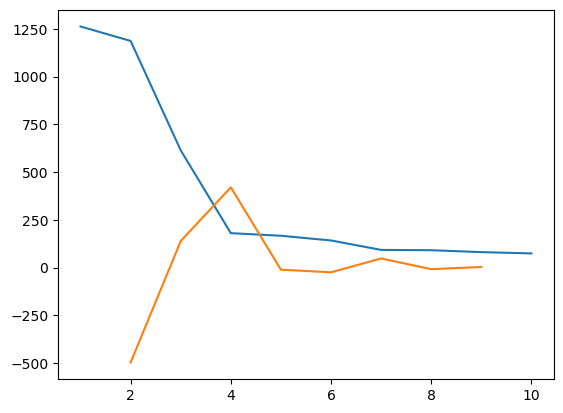

In [90]:
# Visualizar los codos de este dataframe

last = Z2[-10:, 2]
last_rev = last[::-1]
vector = np.arange(1, len(last) + 1)
plt.plot(vector, last_rev)
acc_2 = np.diff(last_rev, 2)
plt.plot(vector[:-2]+1, acc_2)
plt.show()

In [91]:
# Determinar el número óptimo de clusters

k = acc_2.argmax() + 2
k

4

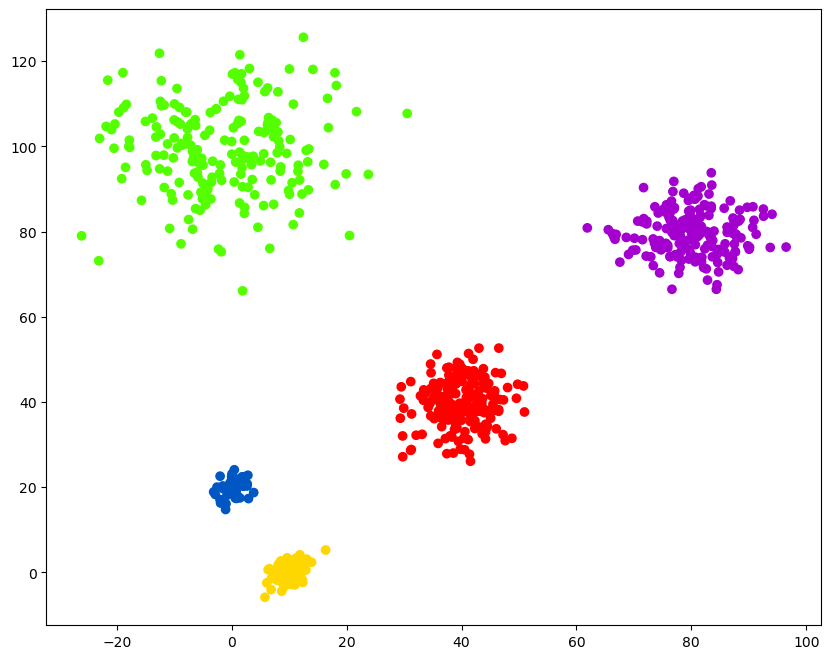

In [103]:
# Pintar los datos de los clusters


clusters = fcluster(Z2, 170, criterion = "distance")
plt.figure(figsize = (10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap = "prism")
plt.show()